In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

import os

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt
from torch.utils.data import Dataset, random_split, DataLoader
print(tf.__version__)

2.4.1


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory('/content/gdrive/Shareddrives/ComED Codes and Data/Dataset/Train',
                                                   target_size=(224,224),
                                                   batch_size=32,
                                                   class_mode='binary',
                                                    seed =1337)
validation_generator = train_datagen.flow_from_directory('/content/gdrive/Shareddrives/ComED Codes and Data/Dataset/Validation',
                                                       target_size=(224,224),
                                                       batch_size=32,
                                                       class_mode='binary',seed=1337)


Found 774 images belonging to 2 classes.
Found 99 images belonging to 2 classes.


In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
from keras import layers
from keras import models
from keras import optimizers

def model_Sequential():
  model = models.Sequential()
  model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)))
  model.add(layers.MaxPool2D((2,2)))
  model.add(layers.Conv2D(64,(3,3),activation='relu'))
  model.add(layers.MaxPool2D((2,2)))
  model.add(layers.Conv2D(128,(3,3),activation='relu'))
  model.add(layers.MaxPool2D((2,2)))
  model.add(layers.Conv2D(128,(3,3),activation='relu'))
  model.add(layers.MaxPool2D((2,2)))
  model.add(layers.Flatten())
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(512,activation='relu'))
  model.add(layers.Dense(1,activation='sigmoid'))
  model.compile(loss='binary_crossentropy',
                optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=["accuracy",f1_m,precision_m, recall_m])
  return model

In [ ]:
model = model_Sequential()

In [ ]:
callbacked = [keras.callbacks.ModelCheckpoint("/content/gdrive/Shareddrives/ComED Codes and Data/model_weights/CNN_{epoch}.h5")]
history = model.fit_generator(train_generator,
                             steps_per_epoch=25,
                             epochs=25,
                             validation_data = validation_generator,
                              callbacks = callbacked)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
25/25 [==============================] - 9s 287ms/step - loss: 44.2937 - accuracy: 0.6302 - f1_m: 0.1198 - precision_m: 0.1041 - recall_m: 0.2912 - val_loss: 0.9749 - val_accuracy: 0.5152 - val_f1_m: 0.4517 - val_precision_m: 0.3269 - val_recall_m: 0.7756
Epoch 2/25
25/25 [==============================] - 7s 265ms/step - loss: 1.7167 - accuracy: 0.7014 - f1_m: 0.3191 - precision_m: 0.3090 - recall_m: 0.4510 - val_loss: 0.8859 - val_accuracy: 0.5152 - val_f1_m: 0.4919 - val_precision_m: 0.3304 - val_recall_m: 0.9688
Epoch 3/25
25/25 [==============================] - 7s 264ms/step - loss: 0.7189 - accuracy: 0.7447 - f1_m: 0.3501 - precision_m: 0.3844 - recall_m: 0.4469 - val_loss: 0.5528 - val_accuracy: 0.7374 - val_f1_m: 0.6549 - val_precision_m: 0.5865 - val_recall_m: 0.7750
Epoch 4/25
25/25 [==============================] - 6s 257ms/step - loss: 0.5343 - accuracy: 0.7949 - f1_m: 0.4276 - precision_m: 0.7121 - recall_m: 0.4421 - val_loss: 0.6431 - val_accuracy: 0.6667 - v

In [ ]:
import matplotlib.pyplot as plt

def plot_curve(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(1,len(acc)+1)
    
    plt.plot(epochs,acc,'-',label='Training acc')
    plt.plot(epochs,val_acc,'-',label='Validation acc',color ="orange")
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.savefig("acc.png", dpi = 300)
    
    plt.figure()
    plt.plot(epochs,loss,'-',label='Training loss')
    plt.plot(epochs,val_loss,'-',label='Validation loss',color ="orange")
    plt.title('Training and validation loss')
    plt.legend()
    
    plt.savefig("loss.png", dpi = 300)

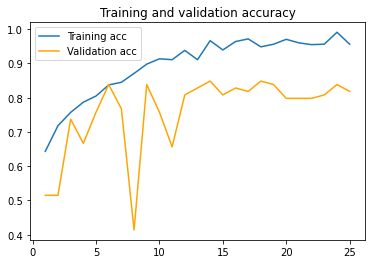

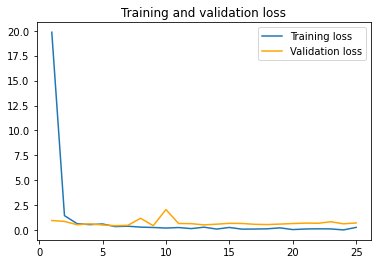

In [ ]:
plot_curve(history)